In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\data\demo_data\9.random.csv",header=None)

In [6]:
data.shape

(400, 3)

In [7]:
data.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

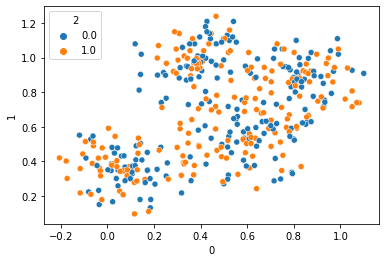

In [8]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [9]:
data[2].value_counts()

1.0    202
0.0    198
Name: 2, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [12]:
x_train.shape

(360, 2)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
std=StandardScaler()

In [15]:
stdd=std.fit_transform(x_train)

In [16]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import tensorflow

In [17]:
import tensorflow.keras 

In [18]:
from tensorflow.keras import Sequential

In [19]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(5,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model=Sequential()
model.add(Dense(25,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Dense(25,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Dense(25,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Dense(25,activation="relu",kernel_initializer="HeNormal"))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 25)                75        
                                                                 
 batch_normalization_4 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 25)                650       
                                                                 
 batch_normalization_5 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 25)                650       
                                                                 
 batch_normalization_6 (Batc  (None, 25)              

In [23]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [24]:
save=model.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
29/29 [==============================] - 7s 30ms/step - loss: 0.7525 - accuracy: 0.5174 - val_loss: 0.7046 - val_accuracy: 0.5417
Epoch 2/20
29/29 [==============================] - 0s 7ms/step - loss: 0.7663 - accuracy: 0.4757 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 3/20
29/29 [==============================] - 0s 7ms/step - loss: 0.7502 - accuracy: 0.4479 - val_loss: 0.6915 - val_accuracy: 0.5278
Epoch 4/20
29/29 [==============================] - 0s 7ms/step - loss: 0.7357 - accuracy: 0.4306 - val_loss: 0.6911 - val_accuracy: 0.5278
Epoch 5/20
29/29 [==============================] - 0s 7ms/step - loss: 0.7172 - accuracy: 0.5278 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 6/20
29/29 [==============================] - 0s 7ms/step - loss: 0.7029 - accuracy: 0.5278 - val_loss: 0.6911 - val_accuracy: 0.5417
Epoch 7/20
29/29 [==============================] - 0s 7ms/step - loss: 0.7148 - accuracy: 0.5174 - val_loss: 0.6944 - val_accuracy: 0.4861
Epoch 8/20
29/29 [=

In [25]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

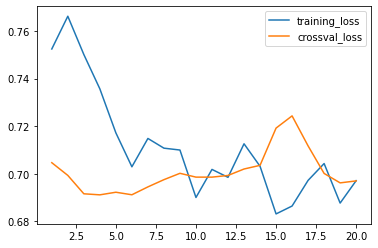

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),tl,label="training_loss")
plt.plot(range(1,21),cvl,label="crossval_loss")
plt.legend()

In [27]:
predi=model.predict(x_train)

12/12 [==============================] - 0s 2ms/step


In [28]:
import numpy as np

In [29]:
preict=np.where(predi>0.5,1,0).flatten()

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_train,preict)


0.5583333333333333

In [32]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 10s 2ms/step


<AxesSubplot:>

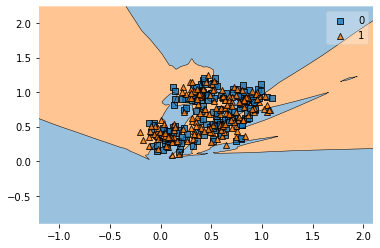

In [33]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)